## 분산분석
## 계산식과 함수이용 결과 비교

In [1]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f

no_samples1 = 500
no_samples2 = 500
no_samples3 = 500

g1 = stats.norm(120,15).rvs(no_samples1)
g2 = stats.norm(120.1,16).rvs(no_samples2)
g3 = stats.norm(120.5,15).rvs(no_samples3)

g1_mean = g1.mean()
g2_mean = g2.mean()
g3_mean = g3.mean()

sse1 = ((g1 - g1_mean)**2).sum()
sse2 = ((g2 - g2_mean)**2).sum()
sse3 = ((g3 - g3_mean)**2).sum()

sse = sse1 + sse2 + sse3
dfe = len(g1) - 1 + len(g2) -1 + len(g3) -1

y = (g1 + g2 + g3).mean()/3.0

sst1 = len(g1) * ((g1_mean - y)**2).sum()
sst2 = len(g2) * ((g2_mean - y)**2).sum()
sst3 = len(g3) * ((g3_mean - y)**2).sum()

sst = sst1 + sst2 + sst3

dft = 2

mst = sst / dft
mse = sse / dfe

fVal = mst / mse

print('F:', fVal)

print('유의확률', 1 - f.cdf(fVal, dft, dfe))

F_statistic, pVal = stats.f_oneway(g1, g2, g3)

print(F_statistic, pVal)
print(stats.f_oneway(g1, g2, g3))


F: 0.23264629254437594
유의확률 0.792462458873755
0.23264629254437186 0.7924624588737474
F_onewayResult(statistic=np.float64(0.23264629254437186), pvalue=np.float64(0.7924624588737474))


## 분산분석 을 위한 정규성 / 등분산 검정
## 분산분석 실행 후 사후검정

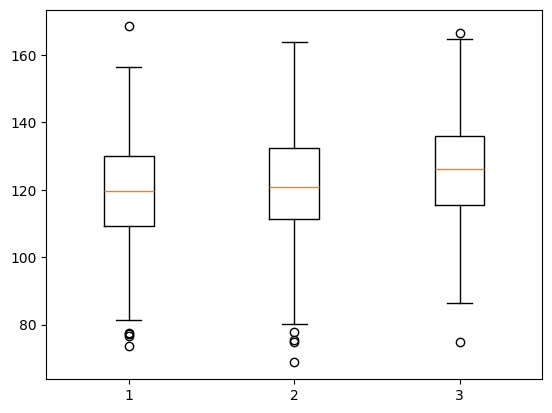

ShapiroResult(statistic=np.float64(0.9978041598944593), pvalue=np.float64(0.7667411273446119))
ShapiroResult(statistic=np.float64(0.9977763846228542), pvalue=np.float64(0.7573929445511919))
ShapiroResult(statistic=np.float64(0.9975180839488322), pvalue=np.float64(0.6677712578485528))
KruskalResult(statistic=np.float64(37.96568917788045), pvalue=np.float64(5.6997439227967974e-09))
BartlettResult(statistic=np.float64(0.6773682103262288), pvalue=np.float64(0.7127075541691248))
FlignerResult(statistic=np.float64(0.8811242756307845), pvalue=np.float64(0.6436744855947039))
LeveneResult(statistic=np.float64(0.4172458496074586), pvalue=np.float64(0.658935518024663))
결과 : F=19.2, p=0.00000
P-value 값이 0.05보다 작으므로 그룹의 평균값이 통계적으로 유의하다.
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   1.0    2.0   1.8548 0.1408 -0.4429 4.1524  False
   1.0    3.0   5.9382    0.0  3.6406 8.2359   True
   2.0

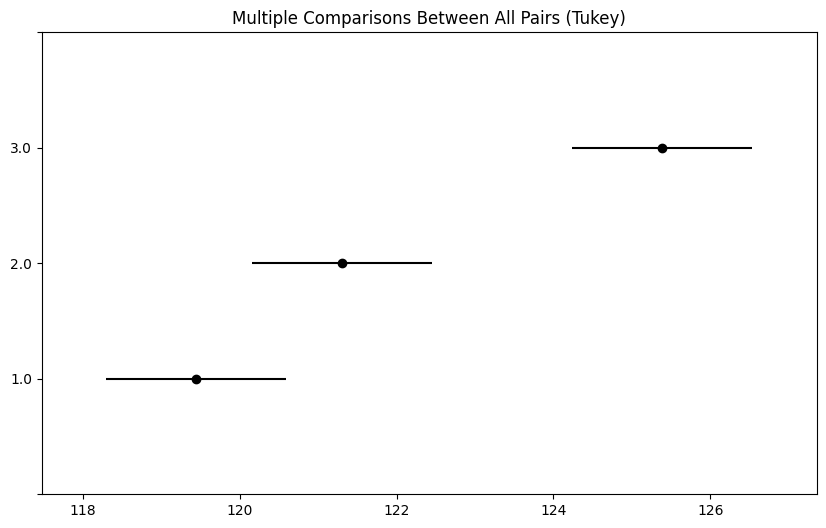

In [4]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd

no_samples1 = 500
no_samples2 = 500
no_samples3 = 500

g1 = stats.norm(120,15).rvs(no_samples1)
g2 = stats.norm(121,15.7).rvs(no_samples2)
g3 = stats.norm(126,15).rvs(no_samples3)


plot_data = [g1, g2, g3]
plt.boxplot(plot_data)
plt.show()

print(stats.shapiro(g1))
print(stats.shapiro(g2))
print(stats.shapiro(g3))

# Kruskal-Wallis 
print(stats.kruskal(g1, g2, g3)) #non-parametic


print(stats.bartlett(g1,g2,g3))
print(stats.fligner(g1,g2,g3))
print(stats.levene(g1,g2,g3)) #등분산  p-value>0.05


F_statistic, pVal = stats.f_oneway(g1, g2, g3)


print('결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 0.05보다 작으므로 그룹의 평균값이 통계적으로 유의하다.')
    

ones = np.ones(no_samples1)
twos = np.ones(no_samples2)+1
threes = np.ones(no_samples3)+2

df1=pd.DataFrame(g1,ones)
df2=pd.DataFrame(g2,twos)
df3=pd.DataFrame(g3,threes)

df = pd.concat([df1,df2,df3],axis=0)
df = df.reset_index()
df.columns=['group', 'value']

posthoc = pairwise_tukeyhsd(df['value'], df['group'], alpha=0.05) 
print(posthoc)

fig = posthoc.plot_simultaneous()

plt.show()


## 반별점수.csv 
## 일원배치분산분석

F-statistic: 12.6726
P-value: 0.00001
귀무가설을 기각합니다. 즉, 세 그룹 간 평균에 유의미한 차이가 있습니다.


/tmp/ipykernel_40017/741609921.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['A'], df['B'], df['C']], labels=['A', 'B', 'C'])


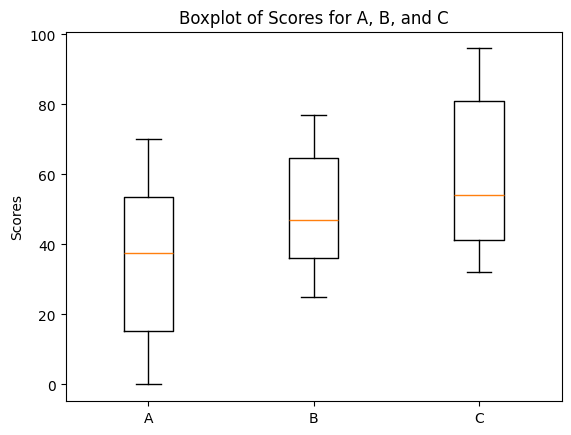


Tukey HSD 결과:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B     14.6 0.0132  2.5696 26.6304   True
     A      C     25.3    0.0 13.2696 37.3304   True
     B      C     10.7 0.0915 -1.3304 22.7304  False
----------------------------------------------------


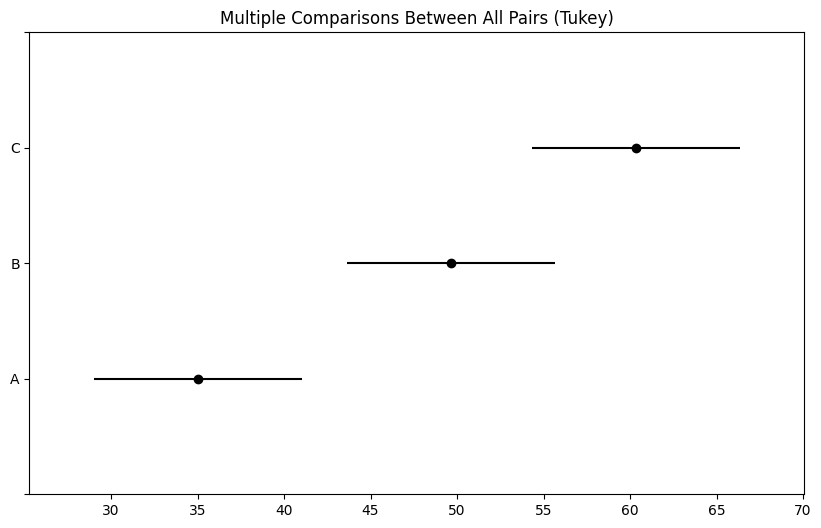

/tmp/ipykernel_40017/741609921.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['A'], df['B'], df['C']], labels=['A', 'B', 'C'])


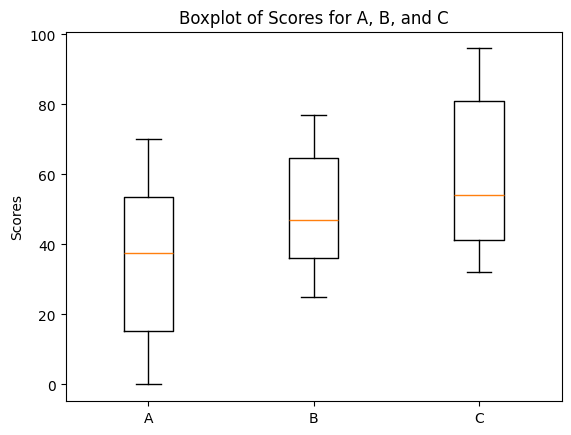

In [ ]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data = pd.read_csv('score.csv')

## 반별 점수 분산분석
df = pd.DataFrame(data)

# ANOVA 수행 (One-Way ANOVA)
F_statistic, p_value = stats.f_oneway(df['A'], df['B'], df['C'])

# 결과 출력
print(f"F-statistic: {F_statistic:.4f}")
print(f"P-value: {p_value:.5f}")

# ANOVA 결과 해석
if p_value < 0.05:
    print("귀무가설을 기각합니다. 즉, 세 그룹 간 평균에 유의미한 차이가 있습니다.")
else:
    print("귀무가설을 기각할 수 없습니다. 즉, 세 그룹 간 평균에 유의미한 차이가 없습니다.")

# 박스플롯으로 시각화
plt.boxplot([df['A'], df['B'], df['C']], labels=['A', 'B', 'C'])
plt.title('Boxplot of Scores for A, B, and C')
plt.ylabel('Scores')
plt.show()

# Tukey HSD 사후 검정
df_melted = df.melt(var_name='Group', value_name='Score')
posthoc = pairwise_tukeyhsd(df_melted['Score'], df_melted['Group'], alpha=0.05)

# Tukey HSD 결과 출력
print("\nTukey HSD 결과:")
print(posthoc)

# Tukey HSD 결과 시각화
fig = posthoc.plot_simultaneous()
plt.show()


## 카이제곱 검정 - 적합도검정(기대빈도)

In [ ]:
#연구가설은 대립가설로 하고 진행
from pandas import DataFrame
from scipy.stats import chisquare
import matplotlib.pyplot as plt
import seaborn as sns


xo, xe = [24, 378, 251], [271, 180, 202]
xc = DataFrame([xo, xe], columns=['Item A', 'Item B', 'Item C'], index=['Obs', 'Exp'])

#############
#bar plot을 작성

# %matplotlib inline

ax = xc.plot(kind='bar', title='Number of Items', figsize=(8, 6))
ax.set_ylabel('value')
plt.grid(color='darkgray')
plt.show()


#from scipy.stats의 chisquare()를 이용하여 카이제곱 검정을 실행


result1 = chisquare(xo, f_exp=xe) # 일원카이제곱 관찰빈도(특정지역) vs. 기대빈도(판매빈도)
print(result1)

#p-value가 1.7334684263715945e-99로 유의수준 0.05보다 아주 작은 값이므로 귀무가설을 기각하고 대립가설을 지지

#즉 연구가설이 지지


## 카이제곱 - 독립성검정

In [ ]:
#연구가설은 대립가설로 하고 진행
from pandas import DataFrame
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns

a, b, c = [205, 80], [180, 200], [120, 200]
df = pd.DataFrame([a, b, c], columns = ['애플', '삼성'], index = ['10대', '20대', '30대'])
df

###########
plt.rc('font', family='Malgun Gothic') 
df.plot(kind = 'bar')

plt.grid()
plt.show()

#############
#bar plot을 작성

result = chi2_contingency(df)
print(result)


### 동질성 검토

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns

a, b = [205, 210, 180], [200, 200, 175]
df = pd.DataFrame([a, b], columns = ['바닐라', '딸기', '초코'], index = ['남', '녀'])

print(df)

## 통계치와 p값 계산